## 1.4. selected marker genes expression

This notebook shows how a curated list of marker genes for different cell types in the HSPC population express in the clusters in our dataset. The list was compiled by Yasmin Demerdash (PhD student in the lab of Marieke Essers), based on careful literature review. You can find the list in the folder `data/gene_lists` as `selected_celltype_marker_genes.csv`.

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# single cell libraries
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 0 

# plotting libraries
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap #for own cmap
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization

### Load data

Here, we load the filtered HSPC dataset (as filtered in notebook 1.3) and the list of selected gene markers.

In [2]:
### load Anndata object with the HSPC dataset (all four subsets incl.)
adata_path = "../data/count_matrices/all_filtered.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
### L2 normalize dataset
adata.X = sk.preprocessing.normalize(adata.X, norm='l2')

In [4]:
### load table with selected gene markers
marker_path = "../data/gene_lists/selected_celltype_marker_genes.csv"
markers = pd.read_csv(marker_path, sep=";")
no_of_genes = len(markers.stack())
markers = markers.to_dict('list')
for i in markers:
    markers[i] = [x for x in markers[i] if str(x) != 'nan']

In [5]:
markers

{'HSCs': ['Procr', 'Ly6a'],
 'ery. prog.': ['Klf1', 'Car1'],
 'LMPPs': ['Dntt', 'Cd34', 'Satb1'],
 'myel. prog.': ['Mpo', 'Calr'],
 'MK prog.': ['Pf4', 'Sdpr'],
 'eosinophil prog.': ['Cd63', 'Cpa3'],
 'Unnamed: 6': ['Kit']}

### Plot expression markers genes
Here, we plot the expression of the marker genes in a dotplot. We generate this plot seperately for each timepoint.

In [6]:
### create own cmap
colors = ["white", "orange",
          "red", "purple", "midnightblue"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

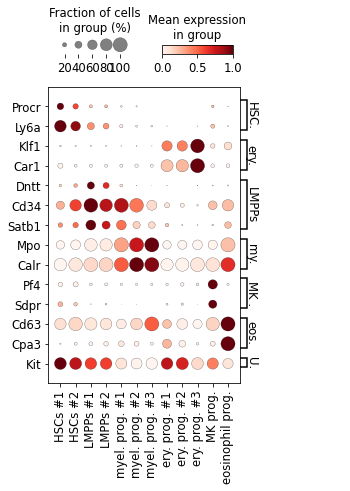

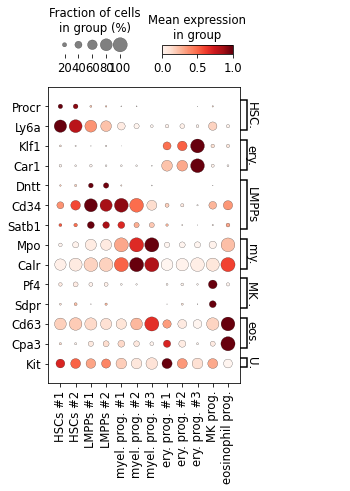

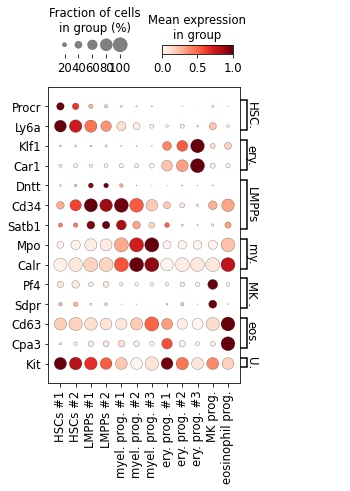

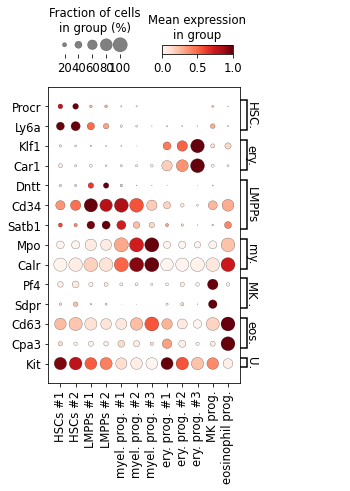

In [7]:
SIZE = 14

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title

for time in adata.obs["time"].cat.categories:

    # plot scores for selected genes set
    fig, axs = plt.subplots(1, 1, figsize=(len(adata.obs["clusters"].cat.categories)*0.44, no_of_genes*0.44),
                                    gridspec_kw={'wspace':0.3, 'hspace':0.3})

    sc.pl.dotplot(adata[adata.obs["time"]==time], var_names=markers,
                  groupby="clusters", standard_scale="var",
                  show=False, ax=axs, swap_axes=True)

    # change position of legend
    pos1_frac = fig.axes[4].get_position() # get the original position 
    pos2_frac = [pos1_frac.x0 - 0.56, pos1_frac.y0 + 0.57,  
                 pos1_frac.width, pos1_frac.height] 
    fig.axes[4].set_position(pos2_frac) # set a new position

    pos1_mean = fig.axes[5].get_position() # get the original position 
    pos2_mean = [pos1_mean.x0 - 0.29, pos1_frac.y0 + 0.57,  
                 pos1_mean.width, pos1_mean.height] 
    fig.axes[5].set_position(pos2_mean) # set a new position

    plt.show()

    # save figure
    save_path = "../figures/1.4.dotplot_selected_marker_genes_"+time+".pdf"
    fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)